## Project Summary

Airbnb is aiming to leverage the surge in travel/tourism to Athens, Greece. Leadership would like to identify key indicators that forecast a positive customer experience at a property. By determining these predictors, they hope to align property recommendations more closely with customer preferences which, we predict, will enhance overall satisfaction.



## Import Libraries & Read In CSV

In [1]:
# Data handling and computation
import pandas as pd
import numpy as np
import zipfile

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Model selection and validation
from sklearn.model_selection import train_test_split, cross_val_score

# Pipeline library for efficient workflow
from sklearn.pipeline import Pipeline

# Metrics libraries for evaluating model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, roc_curve, auc, accuracy_score
from sklearn import metrics

In [2]:
# Read in data locally

zip_file_path = 'data/airbnb_data.csv.zip'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # Extract only the desired CSV, ignoring other files (like the macOS metadata file)
    with z.open('airbnb_data.csv') as f:
        df = pd.read_csv(f)
pd.set_option('display.max_columns', None)


# Read in data using google colab/drive
'''
df = pd.read_csv('/content/drive/MyDrive/Flatiron/capstone/airbnb_data.csv')
pd.set_option('display.max_columns', None)
'''

In [24]:
numerical_features = df.select_dtypes('number')
categorical_features = df.select_dtypes('object')
datetime_features = df.select_dtypes('datetime')

print(f"Numerical columns: \n{list(numerical_features.columns)}\n")
print(f"Categorical columns: \n{list(categorical_features.columns)}\n")
print(f"Datetime columns: \n{list(datetime_features.columns)}")

Numerical columns: 
['id', 'host_response_rate', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'guest_limit', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'rating', 'instant_bookable', 'strict_cancel_policy', 'host_tenure_before_2016', 'good_overall_rating', 'avg_ratings_per_year', 'expensive', 'description_word_count', 'dist_from_downtown']

Categorical columns: 
['name', 'description', 'neighborhood', 'city', 'property_type', 'room_type', 'amenities', 'cancellation_policy']

Datetime columns: 
['host_since', 'first_review', 'last_review']


## EDA

In [25]:
df.head()

,id,name,description,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighborhood,city,latitude,longitude,property_type,room_type,guest_limit,bathrooms,bedrooms,beds,amenities,price,minimum_nights,availability_365,number_of_reviews,first_review,last_review,rating,instant_bookable,cancellation_policy,strict_cancel_policy,host_tenure_before_2016,good_overall_rating,avg_ratings_per_year,expensive,description_word_count,dist_from_downtown
0,10595,"96m2, 3br, 2ba, metro, wi-fi etc...",athens furnished apartment no6 is 3-bedroom ap...,2009-09-08,1.0,1,1,ambelokipi,athens,37.988879,23.764315,apartment,entire home/apt,8.0,2.0,3.0,5.0,"{tv,""cable tv"",internet,wifi,""air conditioning...",71.0,1,294,17,2011-05-20,2019-01-12,96.0,1,strict,2,1,1,2.222351,1,169,2.033857
2,10990,"50m2, metro, wi-fi, cabletv, more",athens furnished apartment no3 is 1-bedroom ap...,2009-09-08,1.0,1,1,ambelokipi,athens,37.987834,23.764787,apartment,entire home/apt,4.0,1.0,1.0,1.0,"{tv,""cable tv"",internet,wifi,""air conditioning...",47.0,1,282,27,2012-09-06,2019-02-01,97.0,1,strict,2,1,1,4.216225,0,165,2.048161
3,10993,"studio, metro, cable tv, wi-fi, etc",the studio is an -excellent located -close t...,2009-09-08,1.0,1,1,ambelokipi,athens,37.988607,23.764222,apartment,entire home/apt,2.0,1.0,0.0,1.0,"{tv,""cable tv"",internet,wifi,""air conditioning...",37.0,1,286,42,2012-09-24,2019-02-02,97.0,1,strict,2,1,1,6.606589,0,168,2.025759
4,10995,"47m2, close to metro,cable tv,wi-fi",aqa no2 is 1-bedroom apartment (47m2) -excell...,2009-09-08,1.0,1,1,ambelokipi,athens,37.989498,23.763562,apartment,entire home/apt,4.0,1.0,1.0,1.0,"{tv,""cable tv"",internet,wifi,""air conditioning...",47.0,2,308,16,2010-07-08,2019-01-11,95.0,1,strict,2,1,1,1.879704,0,171,2.001479
5,27262,"54m2, 1-br, cable tv, wi-fi, metro",big 1-bedroom apartment that can accommodate 4...,2009-09-08,1.0,1,1,ambelokipi,athens,37.988928,23.764749,apartment,entire home/apt,4.0,1.0,1.0,1.0,"{tv,""cable tv"",internet,wifi,""air conditioning...",47.0,1,283,16,2012-09-21,2017-05-15,95.0,1,strict,2,1,1,3.443724,0,167,2.057710


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18980 entries, 0 to 28043
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       18980 non-null  int64         
 1   name                     18980 non-null  object        
 2   description              18980 non-null  object        
 3   host_since               18980 non-null  datetime64[ns]
 4   host_response_rate       18980 non-null  float64       
 5   host_has_profile_pic     18980 non-null  int64         
 6   host_identity_verified   18980 non-null  int64         
 7   neighborhood             18980 non-null  object        
 8   city                     18980 non-null  object        
 9   latitude                 18980 non-null  float64       
 10  longitude                18980 non-null  float64       
 11  property_type            18980 non-null  object        
 12  room_type                18980 n

In [27]:
df.isna().sum()[lambda x: x > 0].sort_values(ascending=False)

Series([], dtype: int64)

## Data Cleaning

In [7]:
# Columns to drop
cols_to_drop = ['zipcode', 'month', 'bed_type', 'transit'
               ]
df.drop(columns=cols_to_drop, inplace=True)


# Cleaning column names
col_name_changed = {'neighbourhood': 'neighborhood',
                    'accommodates': 'guest_limit',
                    'review_scores_rating': 'rating'
                    }
df.rename(columns=col_name_changed, inplace=True)


# Formating all data to lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s)


# Dropping rows with missing values in each column
cols_w_missing_rows = ['host_identity_verified', 'host_has_profile_pic',
                      'host_since', 'city', 'bedrooms', 'name', 'beds',
                      'description', 'neighborhood', 'rating'
                      ]
df.dropna(subset=cols_w_missing_rows, inplace=True)


# Column value conversion
cols_to_convert = ['host_has_profile_pic', 'host_identity_verified',
                   'instant_bookable'
                  ]
df[cols_to_convert] = df[cols_to_convert].replace({'t': 1, 'f': 0})


# Renaming the values in 'property_type' column
property_rename = {
    'apartment': 'apartment', 'house': 'house', 'loft': 'apartment',
    'serviced apartment': 'apartment', 'condominium': 'apartment',
    'aparthotel': 'hotel', 'boutique hotel': 'hotel', 'bed and breakfast': 'bed and breakfast',
    'townhouse': 'house', 'villa': 'villa', 'guest suite': 'guest suite',
    'guesthouse': 'guesthouse', 'hostel': 'hostel', 'other': 'other',
    'hotel': 'hotel', 'earth house': 'house', 'boat': 'boat', 'resort': 'resort',
    'cycladic house (greece)': 'house', 'cave': 'other', 'tiny house': 'house',
    'camper/rv': 'rv', 'cabin': 'cabin', 'cottage': 'house'
                  }
df['property_type'] = df['property_type'].map(property_rename)


# Convert to daytime
daytime_cols = ['host_since', 'first_review', 'last_review']
for col in daytime_cols:
  df[col] = pd.to_datetime(df[col])


# Convert columns to float and drop special characters
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype('float') / 100
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['guest_limit'] = df['guest_limit'].astype(float)


# Replace hyper-specific values
df.loc[(df['cancellation_policy'] != 'moderate') & (df['cancellation_policy'] != 'flexible'), 'cancellation_policy'] = 'strict'


# Fill missing host_response_rate with median value
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].mean())


## Data Filtering

In [8]:
# Filter to only hosts with profile pictures
df = df[(df['host_has_profile_pic'] == 1) &
        (df['room_type'] != 'shared room') &
        (df['guest_limit'] <= 16) &
        (df['minimum_nights'] <= 30) &
        (df['availability_365'] >= 30) &
        (df['property_type'] != 'other')
        ]

## Feature Engineering

In [9]:
# Creating column 'strict_cancel_policy'
df['strict_cancel_policy'] = df['cancellation_policy'].apply(lambda x: 0 if x == 'flexible' else 1 if x == 'moderate' else 2)

# Create binary column named 'host_experience_level'
cutoff_date = pd.to_datetime('2016-01-01')
df['host_tenure_before_2016'] = df['host_since'].apply(lambda x: 1 if x < cutoff_date else 0)

# Create binary column names 'good_rating'
df['good_overall_rating'] = df['rating'].apply(lambda x: 1 if x > 90 else 0)

# Calculate the average number of ratings per year
df['avg_ratings_per_year'] = df['number_of_reviews'] / ((df['last_review'] - df['first_review']).dt.days / 365.25 + np.where((df['last_review'] - df['first_review']).dt.days == 0, 1, 0))

# Create binary column 'expensive'
df['expensive'] = df['price'].apply(lambda x: 1 if x > df['price'].mean() else 0)

# Create a word cound column for the description
df['description_word_count'] = df['description'].str.split().apply(len)


<ipython-input-9-16d14ca767c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strict_cancel_policy'] = df['cancellation_policy'].apply(lambda x: 0 if x == 'flexible' else 1 if x == 'moderate' else 2)


In [10]:
# Step 1: Define coordinates for downtown Athens
lat_downtown = 37.9838  # Approximate latitude for downtown Athens
long_downtown = 23.7275 # Approximate longitude for downtown Athens

# Step 2: Define the Haversine function
def haversine(lat1, lon1, lat2, lon2):
    """Calculate the great circle distance in miles between two points
    on the earth (specified in decimal degrees)"""

    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of earth in miles. Use 6371 for kilometers
    r = 3956.0

    distance = r * c
    return distance

# Step 3: Apply the function to compute distance and create the new column
df['dist_from_downtown'] = df.apply(lambda row: haversine(lat_downtown, long_downtown, row['latitude'], row['longitude']), axis=1)

## Visualizations

Correlation Map

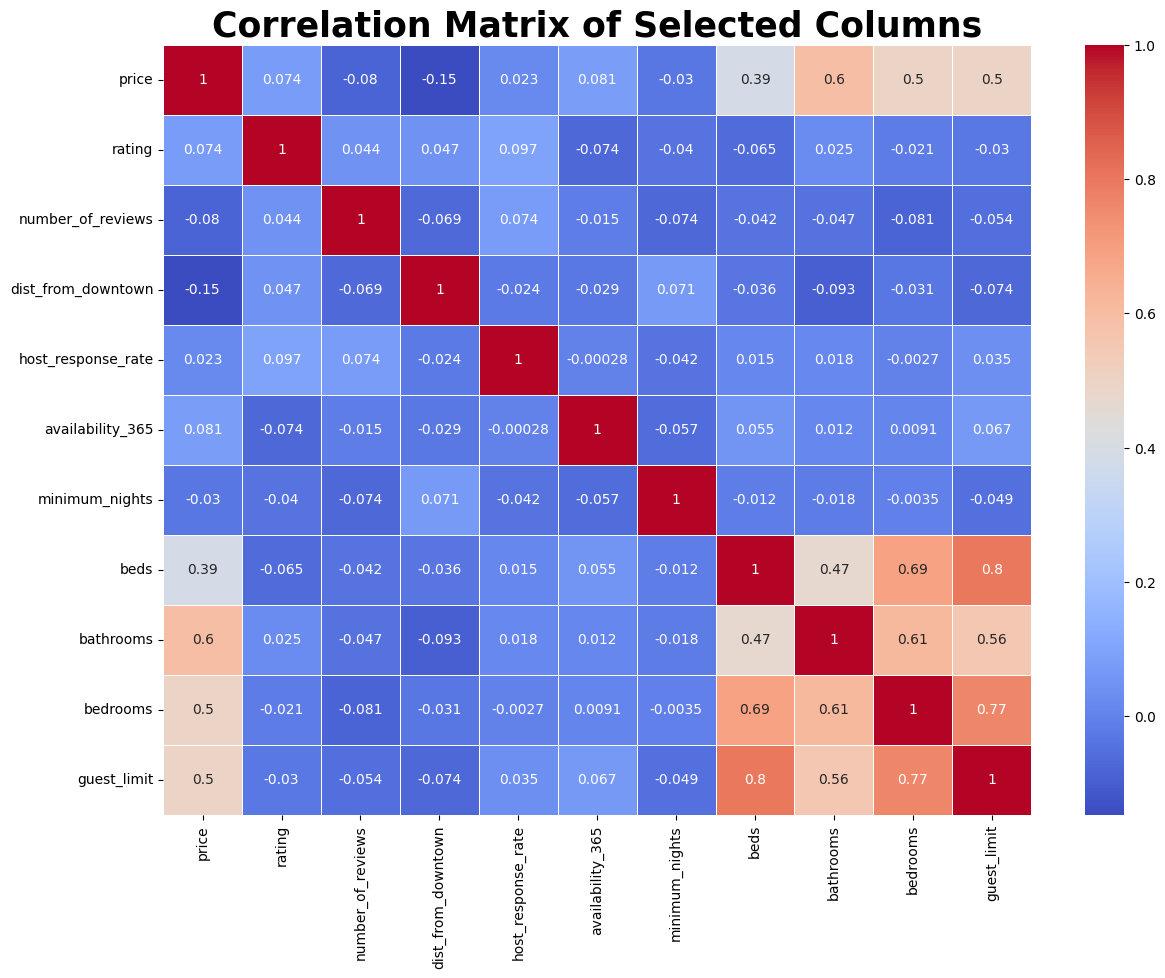

In [11]:
# Calculate the correlation matrix
corr_matrix = df[['price', 'rating', 'number_of_reviews', 'dist_from_downtown', 'host_response_rate', 'availability_365', 'minimum_nights', 'beds', 'bathrooms', 'bedrooms', 'guest_limit']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show plot with a title
plt.title('Correlation Matrix of Selected Columns', fontsize=25, weight='bold')
plt.show()

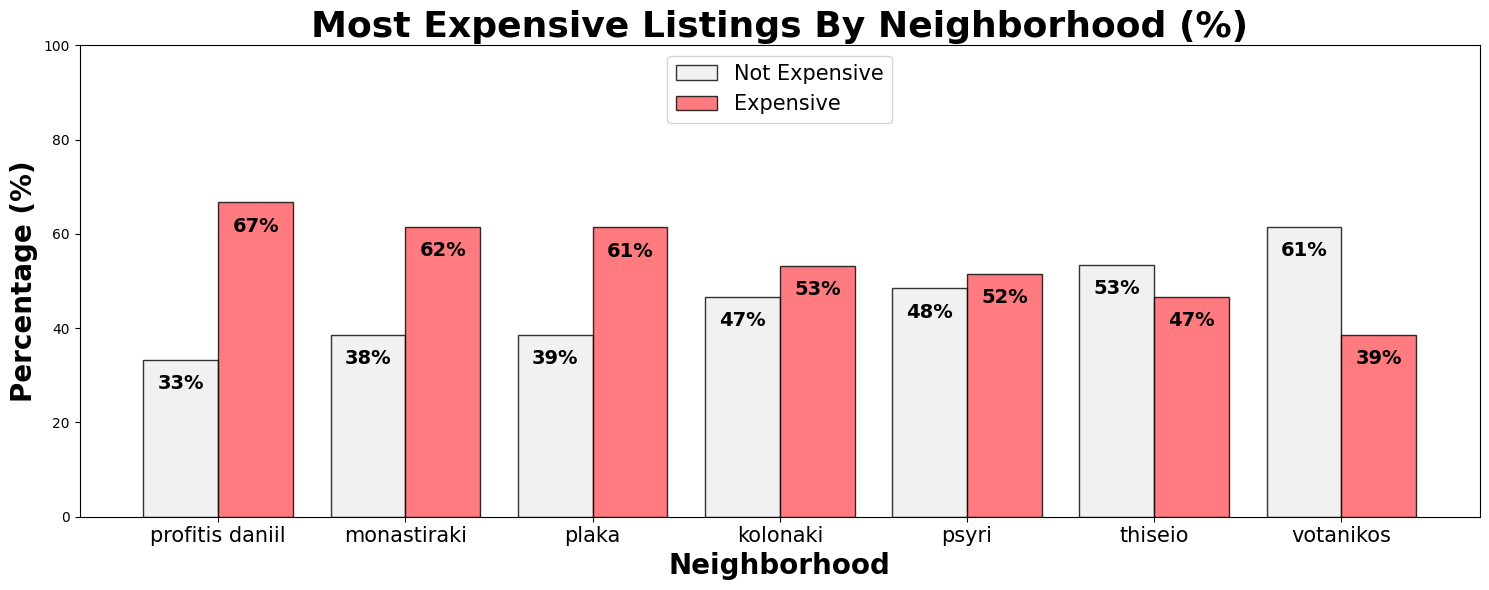

In [12]:
# Compute the counts
counts = df.groupby('neighborhood')['expensive'].value_counts().unstack().fillna(0)

# Calculate the percentage of expensive and not expensive listings
counts['total'] = counts.sum(axis=1)
counts['expensive_percentage'] = counts[1] / counts['total'] * 100
counts['not_expensive_percentage'] = counts[0] / counts['total'] * 100

# Sort by neighborhoods with the highest percentage of expensive listings
sorted_counts = counts.sort_values('expensive_percentage', ascending=False)

# Slice the sorted_counts DataFrame to keep only the top 7 rows
top_7_counts = sorted_counts.iloc[:7]

# Updated color dictionary
color_dict = {0: '#eeeeee', 1: '#ff5a5f'}

# Plot
plt.figure(figsize=(15, 6))
bar_width = 0.40  # Width of bars
indices = range(len(top_7_counts))

# Updating the colors and adding edgecolor
bars_not_expensive = plt.bar(indices, top_7_counts['not_expensive_percentage'], bar_width, label='Not Expensive', color=color_dict[0], alpha=0.8, edgecolor='black')
bars_expensive = plt.bar([i + bar_width for i in indices], top_7_counts['expensive_percentage'], bar_width, label='Expensive', color=color_dict[1], alpha=0.8, edgecolor='black')

plt.xlabel('Neighborhood', fontsize=20, weight='bold')
plt.ylabel('Percentage (%)', fontsize=20, weight='bold')
plt.title('Most Expensive Listings By Neighborhood (%)', fontsize=26, weight='bold')
plt.xticks([i + bar_width / 2 for i in indices], top_7_counts.index, rotation=0, fontsize=15)
plt.legend(fontsize=15, loc='upper center')

# Set y-axis limits to be from 0 to 100
plt.ylim(0, 100)

# Add rounded percentages inside the bars
for bar in bars_not_expensive:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 5, f"{round(yval)}%", ha='center', va='center', color='black', weight='bold', fontsize=14)

for bar in bars_expensive:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 5, f"{round(yval)}%", ha='center', va='center', color='black', weight='bold', fontsize=14)

plt.tight_layout()
plt.show()


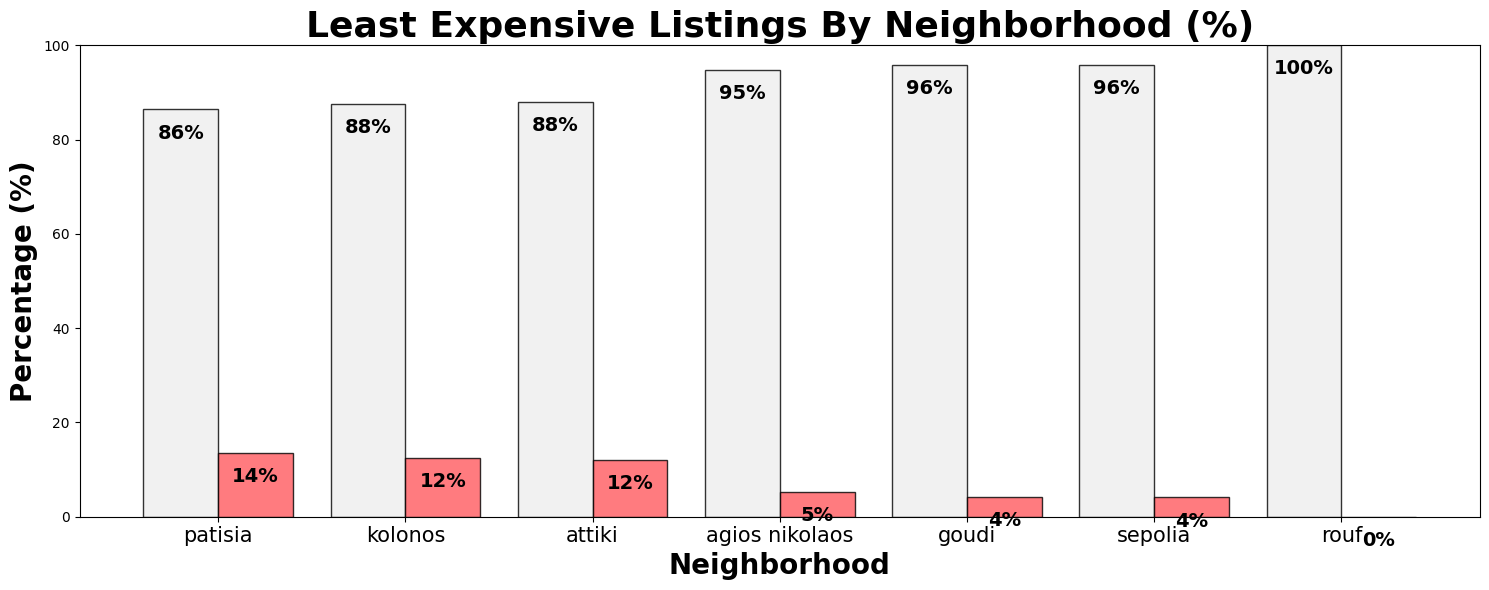

In [13]:
# Compute the counts
counts = df.groupby('neighborhood')['expensive'].value_counts().unstack().fillna(0)

# Calculate the percentage of expensive and not expensive listings
counts['total'] = counts.sum(axis=1)
counts['expensive_percentage'] = counts[1] / counts['total'] * 100
counts['not_expensive_percentage'] = counts[0] / counts['total'] * 100

# Sort by neighborhoods with the highest percentage of expensive listings
sorted_counts = counts.sort_values('expensive_percentage', ascending=False)

# Slice the sorted_counts DataFrame to keep only the last 7 rows
bottom_7_counts = sorted_counts.iloc[-7:]

# Updated color dictionary
color_dict = {0: '#eeeeee', 1: '#ff5a5f'}

# Plot
plt.figure(figsize=(15, 6))
bar_width = 0.40  # Width of bars
indices = range(len(bottom_7_counts))

# Updating the colors and adding edgecolor
bars_not_expensive = plt.bar(indices, bottom_7_counts['not_expensive_percentage'], bar_width, label='Not Expensive', color=color_dict[0], alpha=0.8, edgecolor='black')
bars_expensive = plt.bar([i + bar_width for i in indices], bottom_7_counts['expensive_percentage'], bar_width, label='Expensive', color=color_dict[1], alpha=0.8, edgecolor='black')

plt.xlabel('Neighborhood', fontsize=20, weight='bold')
plt.ylabel('Percentage (%)', fontsize=20, weight='bold')
plt.title('Least Expensive Listings By Neighborhood (%)', fontsize=26, weight='bold')
plt.xticks([i + bar_width / 2 for i in indices], bottom_7_counts.index, rotation=0, fontsize=15)


# Set y-axis limits to be from 0 to 100
plt.ylim(0, 100)

# Add rounded percentages inside the bars
for bar in bars_not_expensive:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 5, f"{round(yval)}%", ha='center', va='center', color='black', weight='bold', fontsize=14)

for bar in bars_expensive:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 5, f"{round(yval)}%", ha='center', va='center', color='black', weight='bold', fontsize=14)

plt.tight_layout()
plt.show()

Below visualization with show:
- expensive neighborhoods (🔴)
- not expensive neighborhoods (🔵)

In [14]:
import pandas as pd
import folium

# Assuming df is your dataframe

# 1. Aggregating Data
# Calculate the total number and the number of expensive listings in each neighborhood
neighborhood_counts = df.groupby('neighborhood')['expensive'].agg(total='size', expensive_sum='sum').reset_index()

# Determine if the majority of listings are expensive
neighborhood_counts['majority_expensive'] = (neighborhood_counts['expensive_sum'] / neighborhood_counts['total']) > 0.5

# 2. Generate Base Map
# Use the average latitude and longitude values to center your map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# 3. Plotting
for idx, row in neighborhood_counts.iterrows():
    neighborhood = df[df['neighborhood'] == row['neighborhood']]
    lat, long = neighborhood['latitude'].mean(), neighborhood['longitude'].mean()
    color = "red" if row['majority_expensive'] else "blue"
    folium.CircleMarker(
        location=[lat, long],
        radius=5,
        popup=f"Neighborhood: {row['neighborhood']}<br>Majority Expensive: {'Yes' if row['majority_expensive'] else 'No'}",
        fill=True,
        color=color,
        fill_color=color
    ).add_to(m)

# 4. Display Map Inline
m


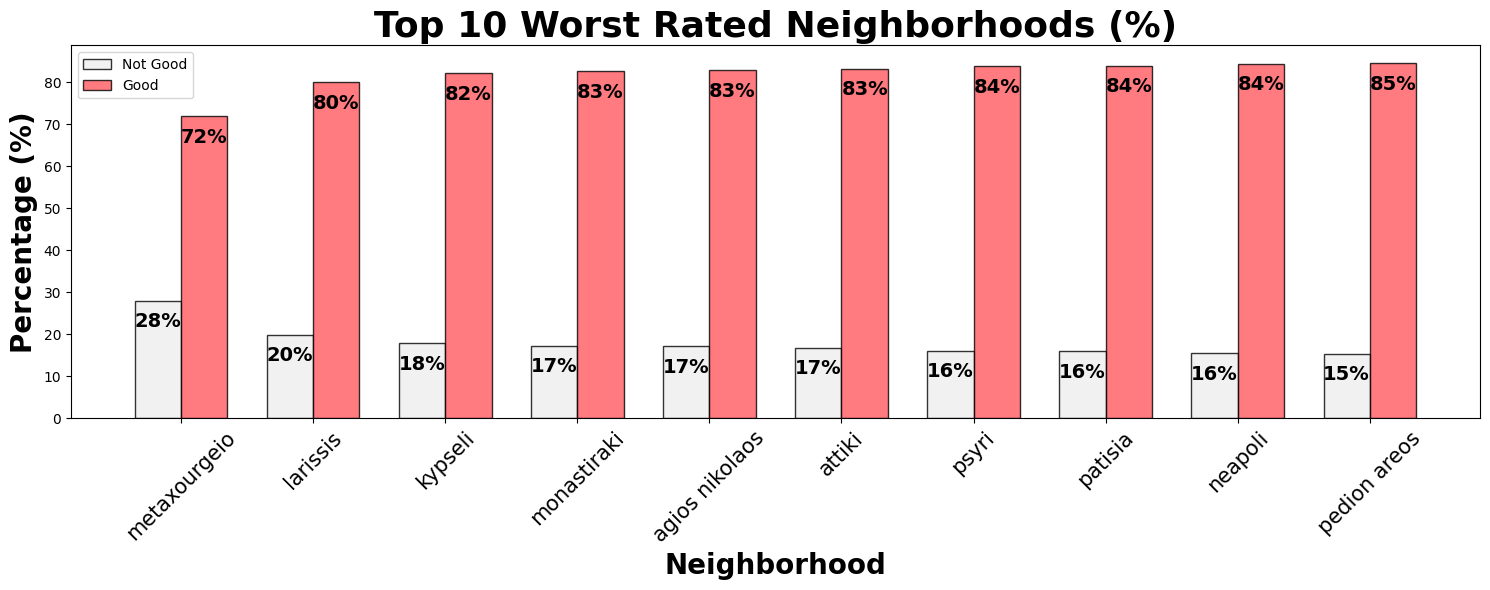

In [15]:
# Compute the counts
counts = df.groupby('neighborhood')['good_overall_rating'].value_counts().unstack().fillna(0)

# Calculate the percentage of good and bad ratings
counts['total'] = counts.sum(axis=1)
counts['good_percentage'] = counts[1] / counts['total'] * 100
counts['bad_percentage'] = counts[0] / counts['total'] * 100

# Sort the DataFrame by bad_percentage and take the top 10
top_10_counts = counts.sort_values('bad_percentage', ascending=False).head(10)

# Updated color dictionary
color_dict = {0: '#eeeeee', 1: '#ff5a5f'}

# Plot
plt.figure(figsize=(15, 6))
bar_width = 0.35  # Width of bars
indices = range(len(top_10_counts))

# Updating the colors and adding edgecolor
bars_bad = plt.bar(indices, top_10_counts['bad_percentage'], bar_width, label='Not Good', color=color_dict[0], alpha=0.8, edgecolor='black')
bars_good = plt.bar([i + bar_width for i in indices], top_10_counts['good_percentage'], bar_width, label='Good', color=color_dict[1], alpha=0.8, edgecolor='black')

plt.xlabel('Neighborhood', fontsize=20, weight='bold')
plt.ylabel('Percentage (%)', fontsize=20, weight='bold')
plt.title('Top 10 Worst Rated Neighborhoods (%)', fontsize=26, weight='bold')
plt.xticks([i + bar_width / 2 for i in indices], top_10_counts.index, rotation=45, fontsize=15)
plt.legend(fontsize=10, loc='upper left')

# Add percentages inside the bars
for bar in bars_bad:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 5, f"{round(yval)}%", ha='center', va='center', color='black', weight='bold', fontsize=14)

for bar in bars_good:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 5, f"{round(yval)}%", ha='center', va='center', color='black', weight='bold', fontsize=14)

plt.tight_layout()
plt.show()


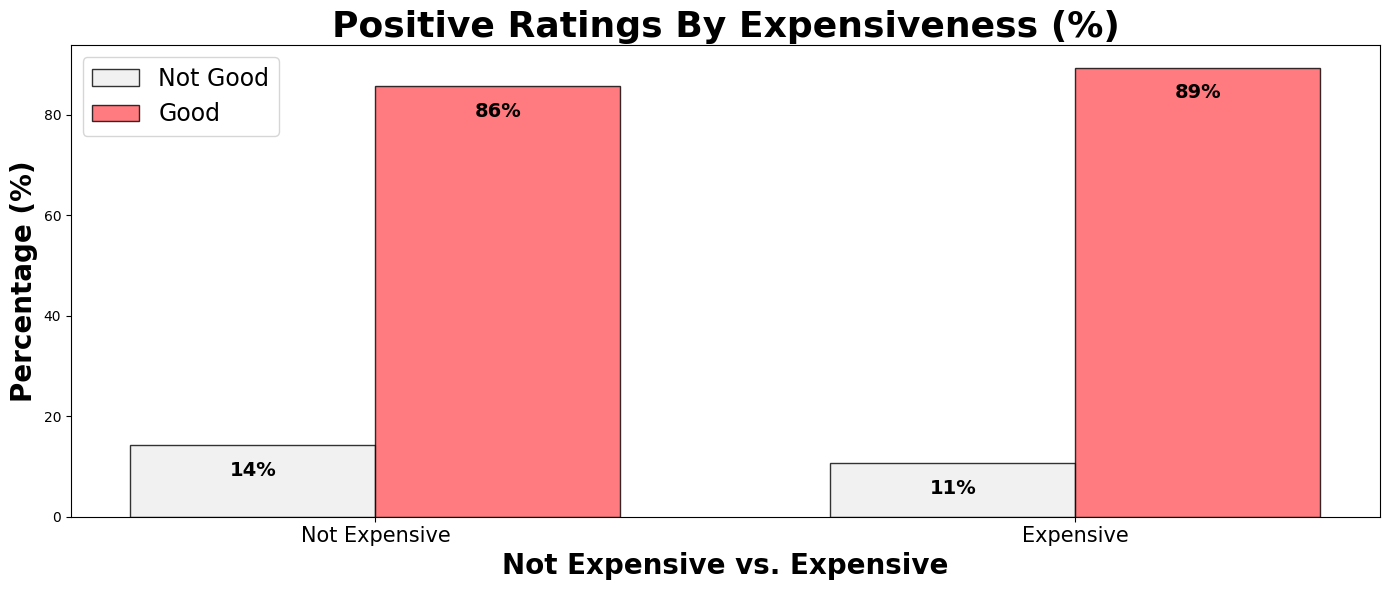

In [16]:
# Compute the counts
counts = df.groupby('expensive')['good_overall_rating'].value_counts().unstack().fillna(0)

# Calculate the percentage of good and bad ratings
counts['total'] = counts.sum(axis=1)
counts['good_percentage'] = counts[1] / counts['total'] * 100
counts['bad_percentage'] = counts[0] / counts['total'] * 100

# Rename index for better visualization
counts.index = ['Not Expensive', 'Expensive']

# Updated color dictionary
color_dict = {0: '#eeeeee', 1: '#ff5a5f'}

# Plot
plt.figure(figsize=(14, 6))
bar_width = 0.35  # Width of bars
indices = range(len(counts))

# Adding edgecolor='black' for the thin black border
bars_bad = plt.bar(indices, counts['bad_percentage'], bar_width, label='Not Good', color=color_dict[0], alpha=0.8, edgecolor='black')
bars_good = plt.bar([i + bar_width for i in indices], counts['good_percentage'], bar_width, label='Good', color=color_dict[1], alpha=0.8, edgecolor='black')

plt.xlabel('Not Expensive vs. Expensive', fontsize=20, weight='bold')
plt.ylabel('Percentage (%)', fontsize=20, weight='bold')
plt.title('Positive Ratings By Expensiveness (%)', fontsize=26, weight='bold')
plt.xticks([i + bar_width / 2 for i in indices], counts.index, fontsize=15)
plt.legend(fontsize=17)

# Add rounded percentages inside the bars
for bar in bars_bad:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 5, f"{round(yval)}%", ha='center', va='center', color='black', weight='bold', fontsize=14)

for bar in bars_good:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 5, f"{round(yval)}%", ha='center', va='center', color='black', weight='bold', fontsize=14)

plt.tight_layout()
plt.show()


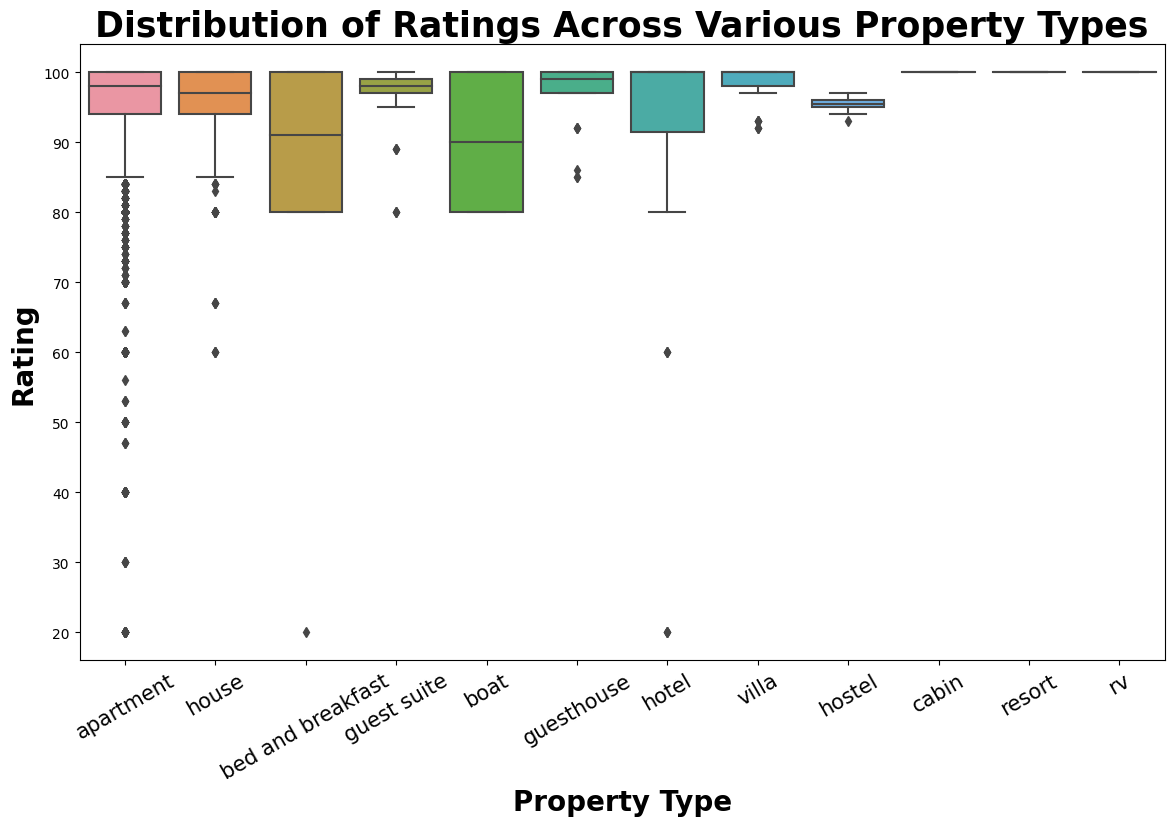

In [17]:
# Box plot for rating distribution across property types
plt.figure(figsize=(14, 8))
sns.boxplot(x="property_type", y="rating", data=df)
plt.xticks(rotation=30, fontsize=15)
plt.xlabel("Property Type", fontsize=20, weight='bold')
plt.ylabel("Rating", fontsize=20, weight='bold')
plt.title("Distribution of Ratings Across Various Property Types", fontsize=25, weight='bold')
plt.show()

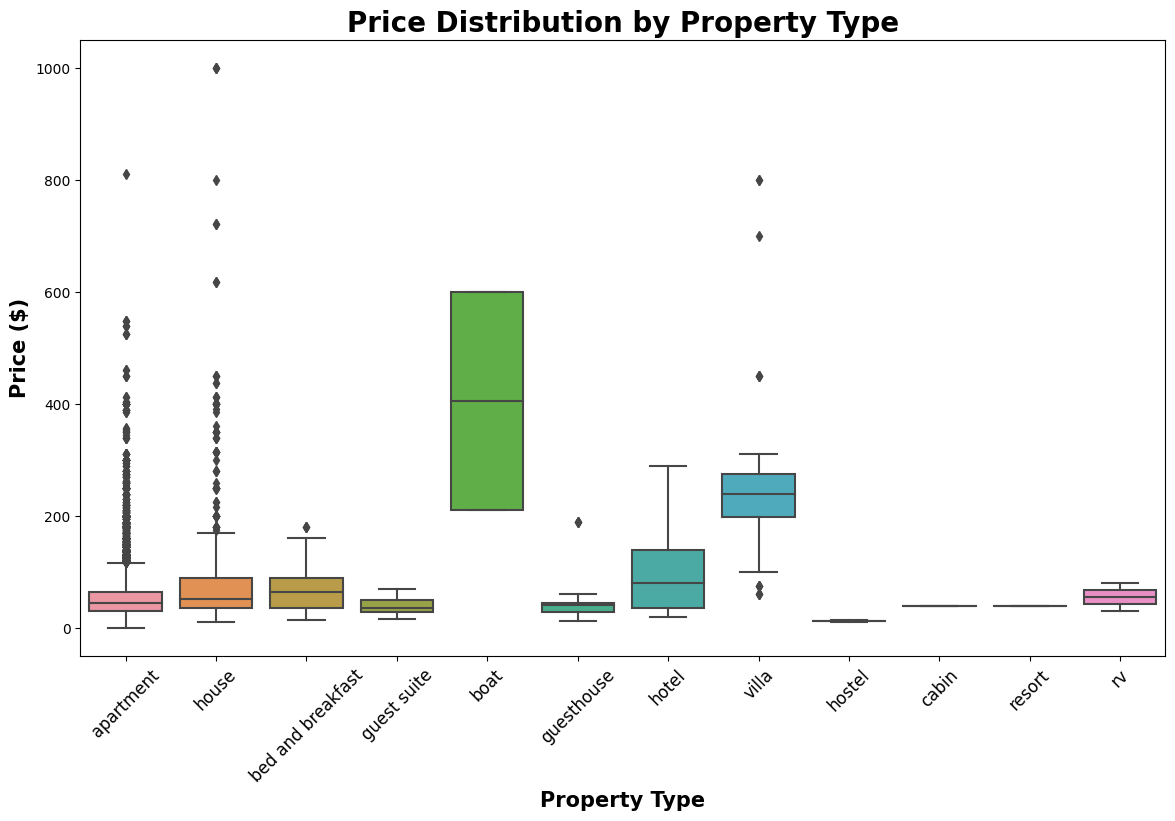

In [18]:
# Custom palette
color_dict = {0: '#eeeeee', 1: '#ff5a5f'}

# Box Plot for price distribution by property_type
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='property_type', y='price')
plt.xticks(rotation=45, fontsize=12)
plt.xlabel("Property Type", fontsize=15, weight='bold')
plt.ylabel("Price ($)", fontsize=15, weight='bold')
plt.title("Price Distribution by Property Type", fontsize=20, weight='bold')
plt.show()

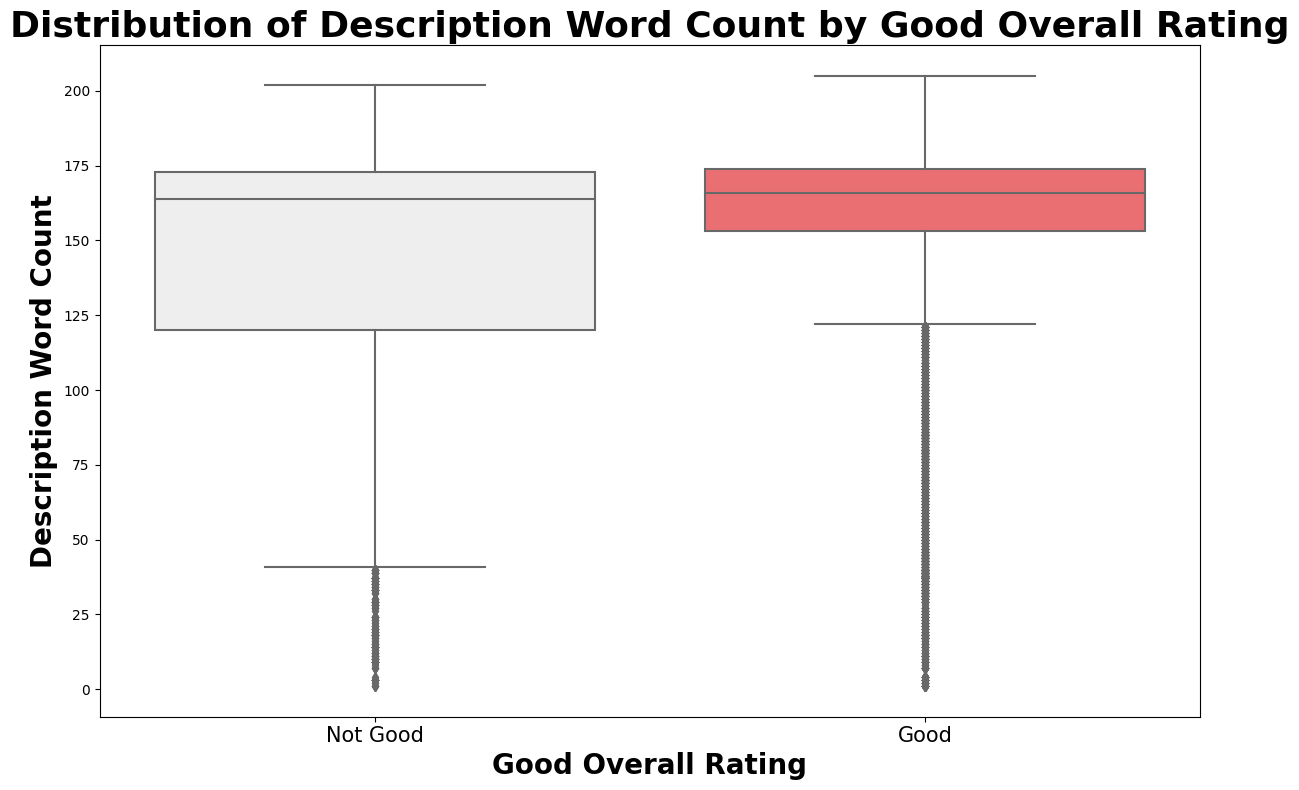

In [19]:
# Custom palette
color_dict = {0: '#eeeeee', 1: '#ff5a5f'}

plt.figure(figsize=(12, 8))
sns.boxplot(x="good_overall_rating", y="description_word_count", data=df, palette=color_dict)

plt.title("Distribution of Description Word Count by Good Overall Rating", fontsize=26, weight='bold')
plt.xticks([0, 1], ['Not Good', 'Good'], fontsize=15)
plt.xlabel("Good Overall Rating", fontsize=20, weight='bold')
plt.ylabel("Description Word Count", fontsize=20, weight='bold')
plt.tight_layout()
plt.show()

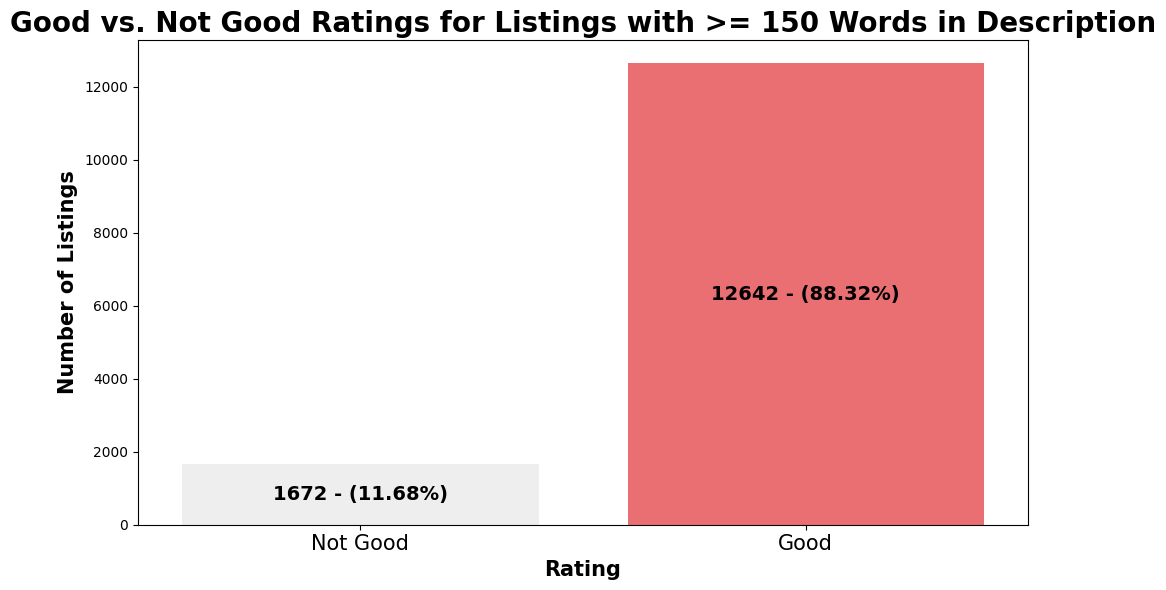

In [20]:
# Filter the dataframe for listings with description_word_count >= 150
filtered_df = df[df['description_word_count'] >= 150]

# Get the counts of "good" and "not good" ratings
rating_counts = filtered_df['good_overall_rating'].value_counts().sort_index()

# Calculate the percentages
total_listings = len(filtered_df)
rating_percentages = (rating_counts / total_listings) * 100

# Color dictionary
color_dict = {0: '#eeeeee', 1: '#ff5a5f'}

# Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=color_dict)

plt.title('Good vs. Not Good Ratings for Listings with >= 150 Words in Description', fontsize=20, weight='bold')
plt.xticks(ticks=[0, 1], labels=['Not Good', 'Good'], fontsize=15)
plt.ylabel('Number of Listings', fontsize=15, weight='bold')
plt.xlabel('Rating', fontsize=15, weight='bold')

# Annotate the bars with the counts and percentages inside the bars
for idx, bar in enumerate(bars.patches):
    bars.annotate(f'{int(bar.get_height())} - ({rating_percentages.iloc[idx]:.2f}%)',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height() * 0.5),
                  ha='center', va='center',
                  color='black', fontsize=14, weight='bold',
                  xytext=(0, 0),
                  textcoords='offset points')

plt.tight_layout()
plt.show()

In [21]:
df.head()

,id,name,description,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighborhood,city,latitude,longitude,property_type,room_type,guest_limit,bathrooms,bedrooms,beds,amenities,price,minimum_nights,availability_365,number_of_reviews,first_review,last_review,rating,instant_bookable,cancellation_policy,strict_cancel_policy,host_tenure_before_2016,good_overall_rating,avg_ratings_per_year,expensive,description_word_count,dist_from_downtown
0,10595,"96m2, 3br, 2ba, metro, wi-fi etc...",athens furnished apartment no6 is 3-bedroom ap...,2009-09-08,1.0,1,1,ambelokipi,athens,37.988879,23.764315,apartment,entire home/apt,8.0,2.0,3.0,5.0,"{tv,""cable tv"",internet,wifi,""air conditioning...",71.0,1,294,17,2011-05-20,2019-01-12,96.0,1,strict,2,1,1,2.222351,1,169,2.033857
2,10990,"50m2, metro, wi-fi, cabletv, more",athens furnished apartment no3 is 1-bedroom ap...,2009-09-08,1.0,1,1,ambelokipi,athens,37.987834,23.764787,apartment,entire home/apt,4.0,1.0,1.0,1.0,"{tv,""cable tv"",internet,wifi,""air conditioning...",47.0,1,282,27,2012-09-06,2019-02-01,97.0,1,strict,2,1,1,4.216225,0,165,2.048161
3,10993,"studio, metro, cable tv, wi-fi, etc",the studio is an -excellent located -close t...,2009-09-08,1.0,1,1,ambelokipi,athens,37.988607,23.764222,apartment,entire home/apt,2.0,1.0,0.0,1.0,"{tv,""cable tv"",internet,wifi,""air conditioning...",37.0,1,286,42,2012-09-24,2019-02-02,97.0,1,strict,2,1,1,6.606589,0,168,2.025759
4,10995,"47m2, close to metro,cable tv,wi-fi",aqa no2 is 1-bedroom apartment (47m2) -excell...,2009-09-08,1.0,1,1,ambelokipi,athens,37.989498,23.763562,apartment,entire home/apt,4.0,1.0,1.0,1.0,"{tv,""cable tv"",internet,wifi,""air conditioning...",47.0,2,308,16,2010-07-08,2019-01-11,95.0,1,strict,2,1,1,1.879704,0,171,2.001479
5,27262,"54m2, 1-br, cable tv, wi-fi, metro",big 1-bedroom apartment that can accommodate 4...,2009-09-08,1.0,1,1,ambelokipi,athens,37.988928,23.764749,apartment,entire home/apt,4.0,1.0,1.0,1.0,"{tv,""cable tv"",internet,wifi,""air conditioning...",47.0,1,283,16,2012-09-21,2017-05-15,95.0,1,strict,2,1,1,3.443724,0,167,2.057710


## Baseline Model

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Extract the relevant columns
df1 = df[['id', 'name', 'description']]

# Using TF-IDF to transform the description
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df1['description'])

# Compute the cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Create a reverse map of indices and listing names
indices = pd.Series(df1.index, index=df1['name']).to_dict()

# Create a function to get recommendations
def get_recommendations(name, cosine_sim=cosine_sim):
    # Get the index of the listing that matches the name
    idx = indices[name]

    # Get the pairwise similarity scores with that listing
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the listings based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar listings
    sim_scores = sim_scores[1:11]

    # Get the listing indices
    listing_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar listings
    return df1['name'].iloc[listing_indices]

# Test the recommender system
recommendations = get_recommendations('96m2, 3br, 2ba, metro, wi-fi etc...')
print(recommendations)


17532    black & white  apt 4 two large terrace ambelokipi
26704    black & white  apt 4 two large terrace ambelokipi
2970                      a cute studio in alexandras ave.
12020                     a cute studio in alexandras ave.
21318                     a cute studio in alexandras ave.
3329     cozy  apartment athens center  ampelokipi pano...
12364    cozy  apartment athens center  ampelokipi pano...
21661    cozy  apartment athens center  ampelokipi pano...
17821      homely quiet flatlet with big terrace 4'  metro
26980      homely quiet flatlet with big terrace 4'  metro
Name: name, dtype: object


## Optimized Model (Not working)

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Create a copy of the dataframe
df2 = df.copy()

# Extract the relevant columns
df2 = df2[['id', 'name', 'description']]

# Using TF-IDF to transform the description
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df2['description'])

# Compute the cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Create a reverse map of indices and listing names, and a mapping from id to name and description
indices = pd.Series(df2.index, index=df2['name']).to_dict()
id_to_name = pd.Series(df2.name, index=df2.id).to_dict()
id_to_desc = pd.Series(df2.description, index=df2.id).to_dict()

# Function to get recommendations based on the listing ID
def get_recommendations_by_id(listing_id, cosine_sim=cosine_sim):
    # Check if the ID exists
    if listing_id not in id_to_name:
        print("Listing ID not found!")
        return

    name = id_to_name[listing_id]
    description = id_to_desc[listing_id]

    # Print the input property's name and description for clarity
    print(f"Selected Property:\nName: {name}\nDescription: {description}\n")

    # Use the indices to get the index of the listing that matches the name
    idx = indices[name]

    # Get the pairwise similarity scores with that listing
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the listings based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar listings
    sim_scores = sim_scores[1:11]

    # Get the listing indices
    listing_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar listings
    return df2['name'].iloc[listing_indices]

# Prompt the user for the listing ID
listing_id_input = int(input("Please enter the listing ID: "))
recommendations = get_recommendations_by_id(listing_id_input)
print(recommendations)

KeyboardInterrupt: ignored

## Conclusion

Customer satisfaction predictors we recommend implimenting along with customer preference are:

- The price has little impact on customer satisfaction of their stay. Recommend more expensive listings if walkability to downtown is very important to the customer.
- The property-type is very important when considering customer satisfaction. Apartments have the highest dissatisfaction of all property types. try avoiding them.
- In the event someone selects an apartment, we have found that the listing descriptions of 150 words or more received positive reviews in nearly 89% of cases. Boost these for the best customer satisfaction.
